# CMSC320: Final Tutorial
### By: Gautham Hari, Evan Guo, Arjun Rajaram

## Introduction

Provided below are links to the various parts of the data science lifecycle that we will go through in this tutorial:

- [Data Collection](#Data-Collection)
    - [Collecting Rotten Tomatoes Dataset](#Collecting-Rotten-Tomatoes-Dataset)
    - [Collecting TMDB Dataset](#Collecting-TMDB-Dataset)
- [Data Processing](#Data-Processing)
    - [Processing Columns](#Processing-Columns)
    - [Data Filtering](#Data-Filtering)
    - [Data Conversion and Column Renaming](#Data-Conversion-and-Column-Renaming)
    - [Merging Dataframes](#Merging-Dataframes)
4. [Exploratory Analysis & Data Visualization](#Exploratory-Analysis-&-Data-Visualization) 
5. [Model: Analysis, Hypothesis Testing, & ML](#Model:-Analysis,-Hypothesis-Testing,-&-ML)
6. [Interpretation: Insight & Policy Decision](#Interpretation:-Insight-&-Policy-Decision)

## Data Collection


This project will involve using the Python programming laguage and a Jupyter Notebook as our IDE. To learn more about Python documentation, click this link [here](https://docs.python.org/3/). To learn more about Jupyter Notebooks and their various tools and functionalities, feel free to click this link [here](https://docs.jupyter.org/en/latest/). 

In this first step of the data science lifecycle, we will collect the necessary datasets containing the features that we would like to clean, process, and analyze to train machine learning models for our regression task of predicting box office revenue (in our case, we are considering box office revenue as the total lifetime box office revenue generated by a movie). On Kaggle, we found two datasets that helped us achieve our goal: the [Full TMDB Movies Dataset 2024 (1 million movies)](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies/data) and the [Rotten Tomatoes Movie and Critic Reviews Dataset](https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset?resource=download&select=rotten_tomatoes_movies.csv). Feel free to click on these links to learn more about the datasets, their backgrounds, and what each of the columns mean or represent. 

Although the TMDB Movies Dataset contains a multitude of features necessary for our analysis and prediction (ex. budget, release date, genres, runtime, etc.), we also wanted to understand how rotten tomatoes and audience ratings play a role in a movie's box office revenue. [Rotten Tomatoes (feel free to learn more about it here)](https://www.rottentomatoes.com/about#:~:text=The%20Tomatometer%20score%20represents%20the,receives%20at%20least%20five%20reviews.) is one of the world's most trusted and used movie recommendation resources that provides a tomatometer score that indicates the percentage of professional critic reviews that are positive for a given film or television show. When at least 60% of reviews for a movie or TV show are positive, the movie/TV show is given a status known as fresh, and if it's less than 60%, it is given a status know nas rotten. The Rotten Tomatoes dataset provides important features such as content rating, tomatometer status, tomatometer rating, audience rating, and more. In this tutorial, we want to see if this feature can play an important role in determining box office revenue, and if there is a correlation between tomato meter/audience rating and box office revenue. 

If you would like to download these datasets for this tutorial, download the CSV files for each dataset on the Kaggle links provided above (for the Rotten Tomatoes dataset, download the rotten_tomatoes_movies.csv).

Provided below are all of the libraries and imports that we will use in this tutorial:

In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


import warnings 
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

/Users/arjunrajaram/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In this section and in the data processing section, we will use the Pandas and NumPy libraries to clean and manipulate our data. Pandas is a library built on top of the Python language and is primarily used for easy and efficient data manipulation and analysis. NumPy is a library used to efficiently perform scientific computing and various type of mathematical operations in Python. Provided below are links to the Pandas and NumPy documentation pages:

[Pandas Documentation](https://pandas.pydata.org/docs/index.html)

[NumPy Documentation](https://numpy.org/doc/stable/index.html#)

### Collecting Rotten Tomatoes Dataset
Here, we are using Pandas and its read_csv function to read in the Rotten Tomatoes movies dataset csv file and store it as a Pandas DataFrame.

In [2]:
rotten_tomatoes_movies_df =pd.read_csv('data/rotten_tomatoes/rotten_tomatoes_movies.csv')
rotten_tomatoes_movies_df

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,m/zoot_suit,Zoot Suit,Mexican-American gangster Henry Reyna (Daniel ...,NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4
17708,m/zootopia,Zootopia,From the largest elephant to the smallest shre...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7
17709,m/zorba_the_greek,Zorba the Greek,Traveling to inspect an abandoned mine his fat...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2
17710,m/zulu,Zulu,"In 1879, the Zulu nation hands colonial Britis...",Zulu patiently establishes a cast of colorful ...,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1


### Collecting TMDB Dataset
Here, we are using Pandas and its read_csv function to read in the TMDB dataset csv file and store it as a Pandas DataFrame.

In [3]:
tmdb_big_dataset=pd.read_csv('data/tmdb-box-office-prediction/TMDB_movie_dataset_v11.csv')
tmdb_big_dataset

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037053,683919,Ellsworth Kelly: Fragments,0.000,0,Released,2007-12-31,0,66,False,NaN,0,NaN,tt26680258,en,Ellsworth Kelly: Fragments,Cameras record artist Ellsworth Kelly as he cr...,0.600,/9RyKOGsaxStcajEN4tuWe15r1w7.jpg,NaN,Documentary,NaN,NaN,NaN,"artist, art"
1037054,683921,César,0.000,0,Released,1971-01-21,0,50,False,NaN,0,NaN,NaN,en,César,"In 1971, Jean-Daniel Pollet & Guy Seligmann di...",0.600,/qEbNDYQJrkH51jF0bZl6GOJxBDe.jpg,Documentary about French artist César Baldaccini,Documentary,NaN,France,French,"sculpture, sculptor, sculpting"
1037055,683922,Notes on Lying,0.000,0,Released,2010-06-23,0,0,False,/ejDohyGHwTqdfu72psJKbFEiI9Q.jpg,0,NaN,tt1934345,en,Notes on Lying,A cautionary tale of lying. A curious thing ha...,0.840,/pPhBv7cyuu4g7dYdBdEkcGB6NQh.jpg,NaN,Drama,Blackbird Studios,"Canada, United States of America",NaN,NaN
1037056,683923,Do Your Homework,0.000,0,Released,2017-03-21,0,75,True,NaN,0,NaN,NaN,en,Do Your Homework,She didn't want to do her homework but she was...,0.600,/sOaPqyL4op1btUxa5pg9i1kz3S2.jpg,NaN,NaN,Nubiles,United States of America,NaN,NaN


## Data Processing
The next step in the data science lifecycle is the data processing stage, where we will be using Pandas and NumPy to clean, process, and manipulate our Pandas DataFrames as necessary to effectively analyze and visualize them in the exploratory data analysis (EDA) stage.

### Processing Columns

Using the Pandas info() function, we can see all of the columns in our DataFrames and get a better understanding of their data types and how many null values they possess.

In [4]:
rotten_tomatoes_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [5]:
tmdb_big_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037058 entries, 0 to 1037057
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1037058 non-null  int64  
 1   title                 1037046 non-null  object 
 2   vote_average          1037058 non-null  float64
 3   vote_count            1037058 non-null  int64  
 4   status                1037058 non-null  object 
 5   release_date          904334 non-null   object 
 6   revenue               1037058 non-null  int64  
 7   runtime               1037058 non-null  int64  
 8   adult                 1037058 non-null  bool   
 9   backdrop_path         288235 non-null   object 
 10  budget                1037058 non-null  int64  
 11  homepage              112137 non-null   object 
 12  imdb_id               580618 non-null   object 
 13  original_language     1037058 non-null  object 
 14  original_title        1037046 non-

Let's first start with removing some of the columns in our DataFrames that we know won't prove helpful for us in the tutorial, don't provide any necessary or meaingful information for our task, or contain too many null values that we can't reasonably impute/fill in. In the next two code cells, we will drop such columns for both datasets using the Pandas drop() function:

In [6]:
tmdb_big_dataset.drop(['id','status', 'overview', 'backdrop_path', 'homepage', 'imdb_id','id','original_title','poster_path','tagline','keywords'], axis=1, inplace=True)


In [7]:
rotten_tomatoes_movies_df.drop(['movie_info','rotten_tomatoes_link','critics_consensus'],axis=1,inplace=True)


### Data Filtering

In this data filtering step, we only want to keep movies in our TMDB data that have revenues of over $1000000, budgets of over $1000000, a voting average of over 0 (because then that means no votes were received for the movie), and we only want movies that have non-null values for important features that we will be using such as runtime, genres, release_date, and popularity. This is because the TMDB dataset contains over 1 million movies, which is an extremely large amount of data that can cause subsequent operations to run very slowly.

In [8]:
tmdb_big_dataset=tmdb_big_dataset[(tmdb_big_dataset['revenue']>=1000000) &(tmdb_big_dataset['budget']>=1000000) & (tmdb_big_dataset['genres']) & (tmdb_big_dataset['release_date']) & (tmdb_big_dataset['runtime']) & (tmdb_big_dataset['popularity']) & (tmdb_big_dataset['vote_average']>0) ]


### Data Conversion

In this next step of data cleaning, we will be converting the format of our data for certain columns into a more appropriate format that will make it easier to operate on them in future stages of our data science lifecycle.

In the below cell, we use a [DateTime](https://docs.python.org/3/library/datetime.html#) object to store the different components of the release_date feature (and add it as the value for the release_date feature), and then we create new columns called release_date, release_year, and release_month to store the values of the different components so that we can use this information during the EDA process (ex. seeing the relationship between year and revenue, or month and revenue). We also want to store the release_year to perform an inner join with the Rotten Tomatoes dataset on both movie title and release year in order to have access to the rotten tomatoes rating data for each movie in our large TMDB dataset.

In [9]:
# for each row, creating release date, year, and month columns using information from a datetime object
for index, row in tmdb_big_dataset.iterrows():
    datetime_object = datetime.datetime.strptime(str(row['release_date']), '%Y-%m-%d')
    tmdb_big_dataset.at[index,"release_date"]=datetime_object
    tmdb_big_dataset.at[index,"release_year"]=datetime_object.year
    tmdb_big_dataset.at[index, "release_month"] = datetime_object.month
    
tmdb_big_dataset.rename(columns={'title': 'movie_title'}, inplace=True) # renaming to match the column name of movie_title with the Rotten Tomatoes dataset for the inner join
tmdb_big_dataset

,movie_title,vote_average,vote_count,release_date,revenue,runtime,adult,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month
1,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0
4,The Avengers,7.710,29166,2012-04-25 00:00:00,1518815515,143,False,220000000,en,98.082,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian",2012.0,4.0
6,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,False,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0
7,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,False,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0
8,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,False,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230598,"Ay, Juancito",7.000,1,2004-06-10 00:00:00,17159458,109,False,2800000,es,0.668,Drama,Aries Cinematográfica Argentina,Argentina,Spanish,2004.0,6.0
272680,Kung Food,7.000,1,2018-08-17 00:00:00,1197984,99,False,20000000,zh,3.597,"Animation, Family","Beijing Culture, Yi Animation",South Korea,Mandarin,2018.0,8.0
281763,Mastaney,10.000,1,2023-08-25 00:00:00,16367572,145,False,2169000,pa,2.907,"Action, Drama, History","Vehli Janta Films, Omjee Star Studios, Fateh F...",India,Punjabi,2023.0,8.0
332657,Ah Girls Go Army,6.000,1,2022-02-01 00:00:00,1785000,121,False,1428000,en,7.974,"Comedy, Drama","J Team Productions, MM2 Entertainment",Singapore,"Mandarin, English",2022.0,2.0


For the Rotten Tomatoes dataset, we are essentially doing the same thing as above in the below cell. Here, we are also extracting the release_year as a column because we want to join this dataset with the TMDB dataset based on movie title and release year in order to create a more comprehensive dataset with all of the features that we want for each movie.

In [10]:
lst=[]
# Creating a datetime object, adding it to the original_release_date column, and and adding a column called release_year with the year
for index, row in rotten_tomatoes_movies_df.iterrows():
    if type(row['original_release_date'])!=str:
        lst.append(index)
    else:
        datetime_object = datetime.datetime.strptime(str(row['original_release_date']), '%Y-%m-%d')
        rotten_tomatoes_movies_df.at[index,"original_release_date"]=datetime_object
        rotten_tomatoes_movies_df.at[index,"release_year"]=datetime_object.year
rotten_tomatoes_movies_df.drop(lst)
rotten_tomatoes_movies_df

,movie_title,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,runtime,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12 00:00:00,2015-11-25,119.0,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,2010.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30 00:00:00,2012-09-04,90.0,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,2010.0
2,10,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05 00:00:00,2014-07-24,122.0,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,1979.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13 00:00:00,2017-01-13,95.0,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,1957.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01 00:00:00,2016-06-10,127.0,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,1954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,Zoot Suit,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02 00:00:00,2016-04-19,104.0,MCA Universal Home Video,Rotten,56.0,9.0,Upright,74.0,1195.0,2,5,4,1981.0
17708,Zootopia,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","J.K. Simmons, Kristen Bell, Octavia Spencer, A...",2016-03-04 00:00:00,2016-06-07,108.0,Walt Disney Animation Studios,Certified-Fresh,98.0,291.0,Upright,92.0,101511.0,50,285,7,2016.0
17709,Zorba the Greek,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17 00:00:00,2015-11-25,142.0,Fox,Fresh,80.0,10.0,Upright,86.0,7146.0,0,8,2,1964.0
17710,Zulu,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17 00:00:00,2017-01-08,135.0,Paramount Pictures,Fresh,96.0,23.0,Upright,91.0,30193.0,6,22,1,1964.0


### Merging Dataframes

Now that we have done the necessary processing for the inner join, we can now merge the two datasets to create a more comprehensive dataset that contains the features we want from the TMDB dataset and the Rotten Tomatoes dataset. One thing to note is that the TMDB dataset contains significantly more movies than the Rotten Tomatoes dataset, so by performing this inner join, we will be reducing the size of our movies dataset drastically. This is because the inner join will only keep movies that have the same movie_title and release_year in both the TMDB and Rotten Tomatoes datasets. We use the Pandas merge() function to achieve this inner join.

In [11]:
# using merge() to perform an inner join on both movie_title and release_year columns
movie_df=pd.merge(tmdb_big_dataset,rotten_tomatoes_movies_df,on=["movie_title","release_year"],how='inner')
movie_df

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,adult,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,authors,actors,original_release_date,streaming_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,False,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,"Christopher Nolan, Jonathan Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014-11-07 00:00:00,2016-05-24,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,Upright,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,False,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27 00:00:00,2018-07-31,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,Upright,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,False,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,Jim Uhls,"Brad Pitt, Edward Norton, Helena Bonham Carter...",1999-10-15 00:00:00,2015-11-25,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,Upright,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,False,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),"James Gunn (II), James Gunn, Nicole Perlman, D...","Chris Pratt, Zoe Saldana, Dave Bautista, Lee P...",2014-08-01 00:00:00,2015-11-15,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,Upright,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,False,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012-12-25 00:00:00,2017-03-24,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,Upright,91.0,429231.0,55,250,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,123,False,2349000,en,3.541,"Drama, Western",Metro-Goldwyn-Mayer,United States of America,"English, Italian",1947.0,4.0,NR,"Classics, Drama, Western",Elia Kazan,"Marguerite Roberts, Vincent Lawrence","Spencer Tracy, Katharine Hepburn, Melvyn Dougl...",1947-04-25 00:00:00,2012-04-16,122.0,Warner Home Video,Rotten,14.0,7.0,Spilled,35.0,149.0,3,1,6
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,101,False,2000000,en,4.384,Drama,"Forward Movement, Kandoo Films",United States of America,English,2012.0,10.0,R,Drama,Ava DuVernay,Ava DuVernay,"Emayatzy E. Corinealdi, David Oyelowo, Omari H...",2012-10-12 00:00:00,2016-11-30,101.0,AFFRM,Certified-Fresh,88.0,50.0,Upright,64.0,2643.0,22,44,6
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,91,False,13000000,en,4.889,"Comedy, Crime, Drama","New Line Cinema, Miramax",United States of America,English,1996.0,4.0,R,"Comedy, Drama",Paul Mazursky,Chazz Palminteri,"Cher, Chazz Palminteri, Ryan O'Neal, Paul Maz

### Feature Processing

Now that we have our fully merged movies dataset that contains all of the features we are interested in, let's perform some more processing on these features.

All of the values in the adult column are False (completely imbalanced), so this column won't be very helpful and we can drop it.

In [12]:
movie_df['adult'].unique() # all are False, so we can drop this column


array([False])

In [13]:
movie_df.drop(['adult'], axis= 1, inplace= True) # dropping adult column
movie_df.head()

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,authors,actors,original_release_date,streaming_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,"Christopher Nolan, Jonathan Nolan","Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014-11-07 00:00:00,2016-05-24,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,Upright,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,"Christopher Markus, Stephen McFeely","Robert Downey Jr., Chris Hemsworth, Mark Ruffa...",2018-04-27 00:00:00,2018-07-31,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,Upright,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,Jim Uhls,"Brad Pitt, Edward Norton, Helena Bonham Carter...",1999-10-15 00:00:00,2015-11-25,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,Upright,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),"James Gunn (II), James Gunn, Nicole Perlman, D...","Chris Pratt, Zoe Saldana, Dave Bautista, Lee P...",2014-08-01 00:00:00,2015-11-15,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,Upright,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012-12-25 00:00:00,2017-03-24,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,Upright,91.0,429231.0,55,250,38


Now let's check which columns still have entries with null values for those columns using the isnull() function. This will help us determine if there are any entries we should remove for our dataset because they might contain null values for columns that we would like to use in our machine learning models.

In [14]:
movie_df.isnull().sum()

movie_title                          0
vote_average                         0
vote_count                           0
release_date                         0
revenue                              0
runtime_x                            0
budget                               0
original_language                    0
popularity                           0
genres_x                             0
production_companies                 5
production_countries                 3
spoken_languages                     1
release_year                         0
release_month                        0
content_rating                       0
genres_y                             0
directors                           19
authors                             36
actors                               5
original_release_date                0
streaming_release_date              16
runtime_y                           12
production_company                  10
tomatometer_status                   3
tomatometer_rating       

From the above null counts, some of the columns like authors, audience_status, streaming_release_date, actors have a lot of rows with null values for them, which could result in a fair amount of data having to be lost (since we can't reasonably impute the null values for these columns). For this reason, we will drop these columns.

In [15]:
# dropping authors and audience status because they aren't very helpful and they result in a loss of a fair amount of rows
movie_df.drop(['authors', 'audience_status', 'streaming_release_date', 'actors'], axis= 1, inplace= True)

We can now drop rows for features containing less than 10 null values (since this will not result in a huge loss of rows) and can't be sensibly imputed. Based on our null count above, we will be using dropna() to drop rows for the following columns (as can be seen in the below cell):

In [16]:
# using dropna() to remove rows that contain null values for the following columns
movie_df = movie_df.dropna(subset = ['production_companies', 'production_countries', 'spoken_languages', 'production_company', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count', 'directors'])

movie_df

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,original_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,2014-11-07 00:00:00,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,2018-04-27 00:00:00,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,1999-10-15 00:00:00,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),2014-08-01 00:00:00,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,2012-12-25 00:00:00,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,123,2349000,en,3.541,"Drama, Western",Metro-Goldwyn-Mayer,United States of America,"English, Italian",1947.0,4.0,NR,"Classics, Drama, Western",Elia Kazan,1947-04-25 00:00:00,122.0,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,101,2000000,en,4.384,Drama,"Forward Movement, Kandoo Films",United States of America,English,2012.0,10.0,R,Drama,Ava DuVernay,2012-10-12 00:00:00,101.0,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,91,13000000,en,4.889,"Comedy, Crime, Drama","New Line Cinema, Miramax",United States of America,English,1996.0,4.0,R,"Comedy, Drama",Paul Mazursky,1996-04-05 00:00:00,88.0,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,79,12000000,en,4.933,"Comedy, Romance, Family",Universal Pictures,United States of America,English,1981.0,12.0,PG,"Comedy, Science Fiction & Fantasy",Allan Arkush,1981-12-18 00:00:00,79.0,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6


Another feature we need to consider is runtime (the duration of a given movie). Since this feature was in both datasets, when we did the inner join, it resulted in runtime_x and runtime_y columns (each corresponding to their respective datasets). Since these two runtime columns may contain slightly differnt values, we will take the average value of the two runtime columns for a given movie and set that average value as the runtime for the movie.

In [17]:
movie_df['runtime'] = 0.0 # creating new runtime column to hold the average value

# taking the average valye of the runtime_x and runtime_y value and using that value as the runtime for a given movie
for index,row in movie_df.iterrows():
    if pd.isnull(row['runtime_y']): # if runtime_y is null, just use runtime_x
        movie_df.at[index, 'runtime'] = float(row['runtime_x'])
    else:
        movie_df.at[index, 'runtime'] = (float(row['runtime_x']) + row['runtime_y']) / 2

movie_df.head()

,movie_title,vote_average,vote_count,release_date,revenue,runtime_x,budget,original_language,popularity,genres_x,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres_y,directors,original_release_date,runtime_y,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Christopher Nolan,2014-11-07 00:00:00,165.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,149,300000000,en,154.340,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",Anthony Russo,2018-04-27 00:00:00,149.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,139,63000000,en,69.498,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,"Comedy, Drama",David Fincher,1999-10-15 00:00:00,139.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,121,170000000,en,33.255,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,2014.0,7.0,PG-13,"Action & Adventure, Science Fiction & Fantasy",James Gunn (II),2014-08-01 00:00:00,121.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,165,100000000,en,54.224,"Drama, Western","The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,"Drama, Western",Quentin Tarantino,2012-12-25 00:00:00,165.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0


We are also facing the same issue with the genres column, namely that there is a genres_x and genres_y column in our dataset. For this feature, since genres_y contains a greater amount and selection of genre categories, we set genres_y as our genres feature. Since the genres feature contains a string of genres for a given movie, we will pick the first genre in the string to simplify the feature engineering and model training process, and also allow for one-hot encoding on this genre feature. One-hot encoding is an encoding technique that involves converting a categorical variable into a numerical format that the model can learn from during training (it essentially results in additional columns for each category of a given feature and gives the value of 1 to an observation if that observation is that category and 0 if it is not, but this means an increase in our feature dimensionality).

In [18]:
movie_df.rename(columns={'genres_y' : 'genres'}, inplace= True) # renaming

# setting genre to be the first genre in the list of genres
for index, row in movie_df.iterrows():
    genres = row['genres'].split(",")
    movie_df.at[index, 'genres'] = genres[0]

Now that we have finished processing and setting the runtime and genre columns, we can drop runtime_x, runtime_y, and genres_x columns from our movie dataframe

In [19]:
movie_df.drop(['runtime_x', 'runtime_y', 'genres_x'], axis= 1, inplace= True)
movie_df.head()

,movie_title,vote_average,vote_count,release_date,revenue,budget,original_language,popularity,production_companies,production_countries,spoken_languages,release_year,release_month,content_rating,genres,directors,original_release_date,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,en,140.241,"Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,11.0,PG-13,Action & Adventure,Christopher Nolan,2014-11-07 00:00:00,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,en,154.340,Marvel Studios,United States of America,"English, Xhosa",2018.0,4.0,PG-13,Action & Adventure,Anthony Russo,2018-04-27 00:00:00,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,en,69.498,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,1999.0,10.0,R,Comedy,David Fincher,1999-10-15 00:00:00,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,en,33.255,Marvel Studios,United States of America,English,2014.0,7.0,PG-13,Action & Adventure,James Gunn (II),2014-08-01 00:00:00,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,en,54.224,"The Weinstein Company, Columbia Pictures",United States of America,"English, French, German",2012.0,12.0,R,Drama,Quentin Tarantino,2012-12-25 00:00:00,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0


Now let's consider our production_companies, spoken_languages, production_countries, and directors features. Each of these features are represented as lists of values, and there are a wide range of values for each of these features (meaning that one-hot encoding these features won't be very reasonable since we will have a dataframe with a huge amount of columns). To overcome this issue, simplify the feature engineering process, and still retain some information from these important features, we will instead opt to keep track of the number of production comanies, spoken languages, production countries, and directors. While we lose the exact values, we can instead try to understand how the numbers of each of these features plays a role in predicting box office revenue (does a higher number of production companies correlate to higher revenue, does a high number of production countries correlate to a higher revenue, etc.).

In [20]:
movie_df['num_prod_companies'] = 0
movie_df['num_spoken_languages'] = 0
movie_df['num_prod_countries'] = 0
movie_df['num_directors'] = 0

# for each row, extracting the relevant information from the string, and determine the relevant numerical information
for index, row in movie_df.iterrows():
    prod_companies = row['production_companies'].split(",")
    spoken_langauges = row['spoken_languages'].split(",")
    prod_countries = row['production_countries'].split(",")
    directors = row['directors'].split(",")

    movie_df.at[index, 'num_prod_companies'] = len(prod_companies)
    movie_df.at[index, 'num_spoken_languages'] = len(spoken_langauges)
    movie_df.at[index, 'num_prod_countries'] = len(prod_countries)
    movie_df.at[index, 'num_directors'] = len(directors)

movie_df.drop(['production_companies', 'spoken_languages', 'production_countries', 'directors', 'original_release_date'], axis= 1, inplace= True)
movie_df

,movie_title,vote_average,vote_count,release_date,revenue,budget,original_language,popularity,release_year,release_month,content_rating,genres,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,en,140.241,2014.0,11.0,PG-13,Action & Adventure,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,en,154.340,2018.0,4.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,en,69.498,1999.0,10.0,R,Comedy,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,en,33.255,2014.0,7.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,en,54.224,2012.0,12.0,R,Drama,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,en,3.541,1947.0,4.0,NR,Classics,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6,122.5,1,2,1,1
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,2000000,en,4.384,2012.0,10.0,R,Drama,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6,101.0,2,1,1,1
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,13000000,en,4.889,1996.0,4.0,R,Comedy,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14,89.5,2,1,1,1
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,12000000,en,4.933,1981.0,12.0,PG,Comedy,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6,79.0,1,1,1,1


For the release_year feature, since we have a wide range of years to consider, we will bin this feature into decades (ex. 1980's, 1990's, 2010's, 2020's, etc.). This will allow for easier visualization and will also allow for one-hot-encoding of the bins, which we will see later.

In [21]:
movie_df['release_decade'] = (movie_df['release_year'] // 10) * 10 # creating the bins and the release_decade column
movie_df

,movie_title,vote_average,vote_count,release_date,revenue,budget,original_language,popularity,release_year,release_month,content_rating,genres,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,release_decade
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,en,140.241,2014.0,11.0,PG-13,Action & Adventure,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1,2010.0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,en,154.340,2018.0,4.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1,2010.0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,en,69.498,1999.0,10.0,R,Comedy,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1,1990.0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,en,33.255,2014.0,7.0,PG-13,Action & Adventure,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1,2010.0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,en,54.224,2012.0,12.0,R,Drama,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,en,3.541,1947.0,4.0,NR,Classics,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6,122.5,1,2,1,1,1940.0
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,2000000,en,4.384,2012.0,10.0,R,Drama,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6,101.0,2,1,1,1,2010.0
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,13000000,en,4.889,1996.0,4.0,R,Comedy,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14,89.5,2,1,1,1,1990.0
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,12000000,en,4.933,1981.0,12.0,PG,Comedy,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6,79.0,1,1,1,1,1980.0


## Exploratory Analysis & Data Visualization

In [22]:
movie_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2324
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       2285 non-null   object 
 1   vote_average                      2285 non-null   float64
 2   vote_count                        2285 non-null   int64  
 3   release_date                      2285 non-null   object 
 4   revenue                           2285 non-null   int64  
 5   budget                            2285 non-null   int64  
 6   original_language                 2285 non-null   object 
 7   popularity                        2285 non-null   float64
 8   release_year                      2285 non-null   float64
 9   release_month                     2285 non-null   float64
 10  content_rating                    2285 non-null   object 
 11  genres                            2285 non-null   object 
 12  produc

After processing and cleaning our data, we can explore ann visualize our data to best get a feel for how it can be used to perform prediction on box office score. 


The first thing we will do is graph box office scores against time to visualize how box office scores have not only changed with time, but also the range of box office scores that our dataset contains. 

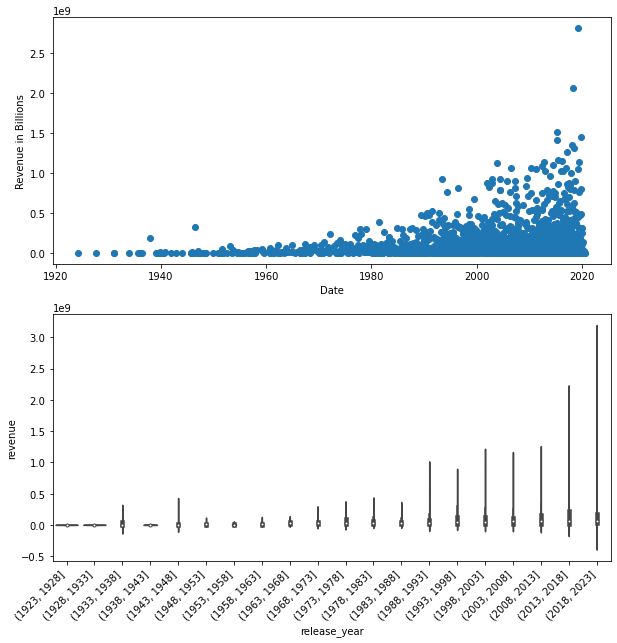

In [23]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.scatter(movie_df['release_date'],movie_df['revenue'])
plt.ylabel("Revenue in Billions")
plt.xlabel("Date")

plt.subplot(2,1,2)
years = list(np.arange(1923,2024,5))
bins = pd.cut(movie_df['release_year'], bins=years)
sns.violinplot(x=bins,y=movie_df['revenue'])
plt.xticks(rotation=45, ha='right')

plt.show()





<AxesSubplot:xlabel='release_year'>

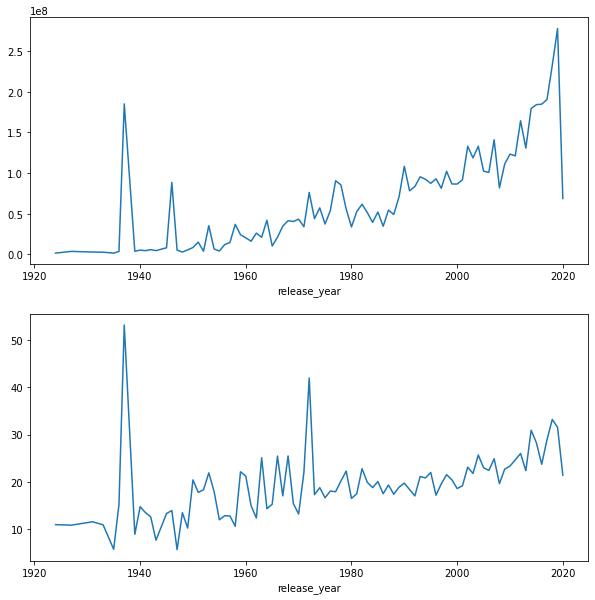

In [24]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
release_year_groupings= movie_df.groupby(['release_year'])
revenue_groupings = release_year_groupings['revenue'].mean()
sns.lineplot(x=revenue_groupings.keys(),y=revenue_groupings.values)
plt.subplot(2,1,2)

popularity_groupings = release_year_groupings['popularity'].mean()
sns.lineplot(x=popularity_groupings.keys(),y=popularity_groupings.values)



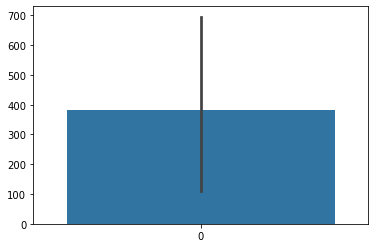

In [25]:
    # Ocurrences of ratings
content_ratings_count = movie_df['content_rating'].value_counts()
x_content_ratings = content_ratings_count.keys()
y_occurrences=content_ratings_count.values
ax=sns.barplot(data=content_ratings_count)
plt.show()

<AxesSubplot:xlabel='content_rating', ylabel='revenue'>

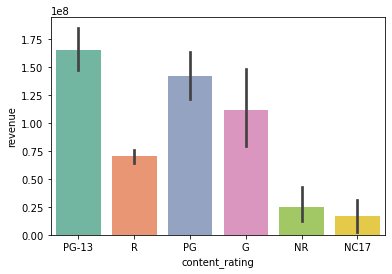

In [26]:
sns.barplot(x=movie_df['content_rating'],y=movie_df['revenue'],palette='Set2')

<AxesSubplot:xlabel='budget', ylabel='revenue'>

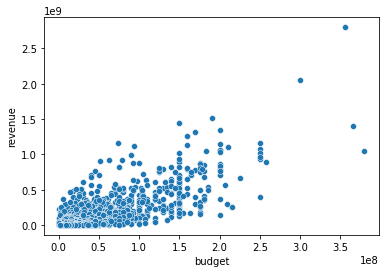

In [27]:
sns.scatterplot(x=movie_df['budget'],y=movie_df['revenue'])


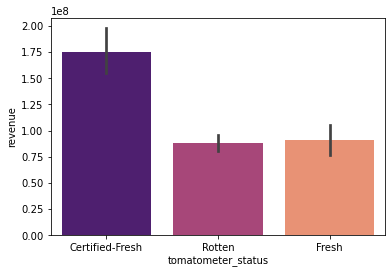

In [28]:
ax=sns.barplot(data=movie_df,x='tomatometer_status',y='revenue',palette='magma')



<AxesSubplot:xlabel='num_spoken_languages', ylabel='revenue'>

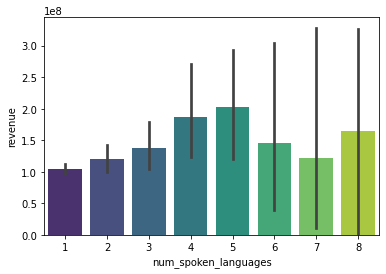

In [29]:
sns.barplot(data=movie_df,x='num_spoken_languages',y='revenue',palette='viridis')


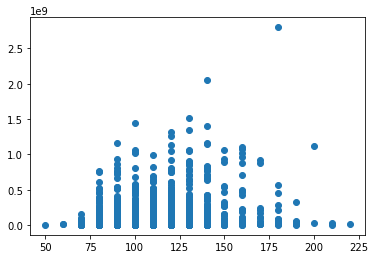

In [30]:
movie_df['runtime_bins'] = (movie_df['runtime'] // 10) * 10

plt.scatter(movie_df['runtime_bins'],movie_df['revenue'])


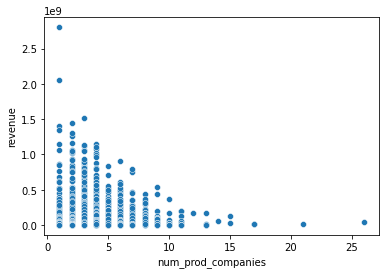

In [31]:
sns.scatterplot(data = movie_df, x = 'num_prod_companies', y = 'revenue')
plt.show()

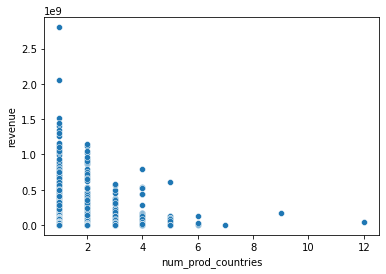

In [32]:

sns.scatterplot(data = movie_df, x = 'num_prod_countries', y = 'revenue')
plt.show()

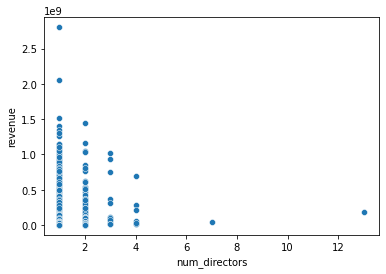

In [33]:
sns.scatterplot(data = movie_df, x = 'num_directors', y = 'revenue')
plt.show()

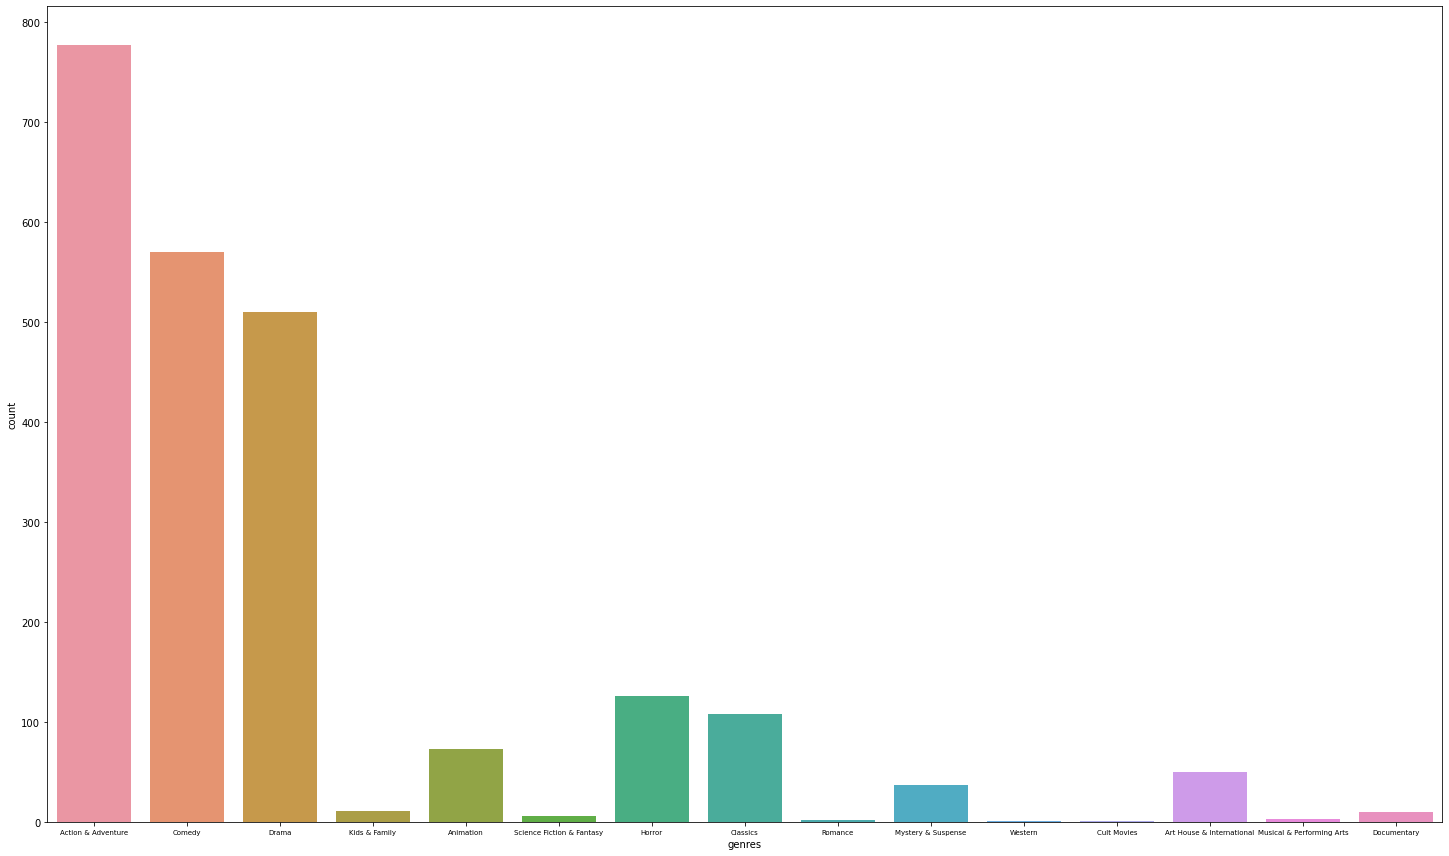

In [34]:

ax = sns.countplot(data= movie_df, x = "genres")
ax.figure.set_size_inches(25, 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

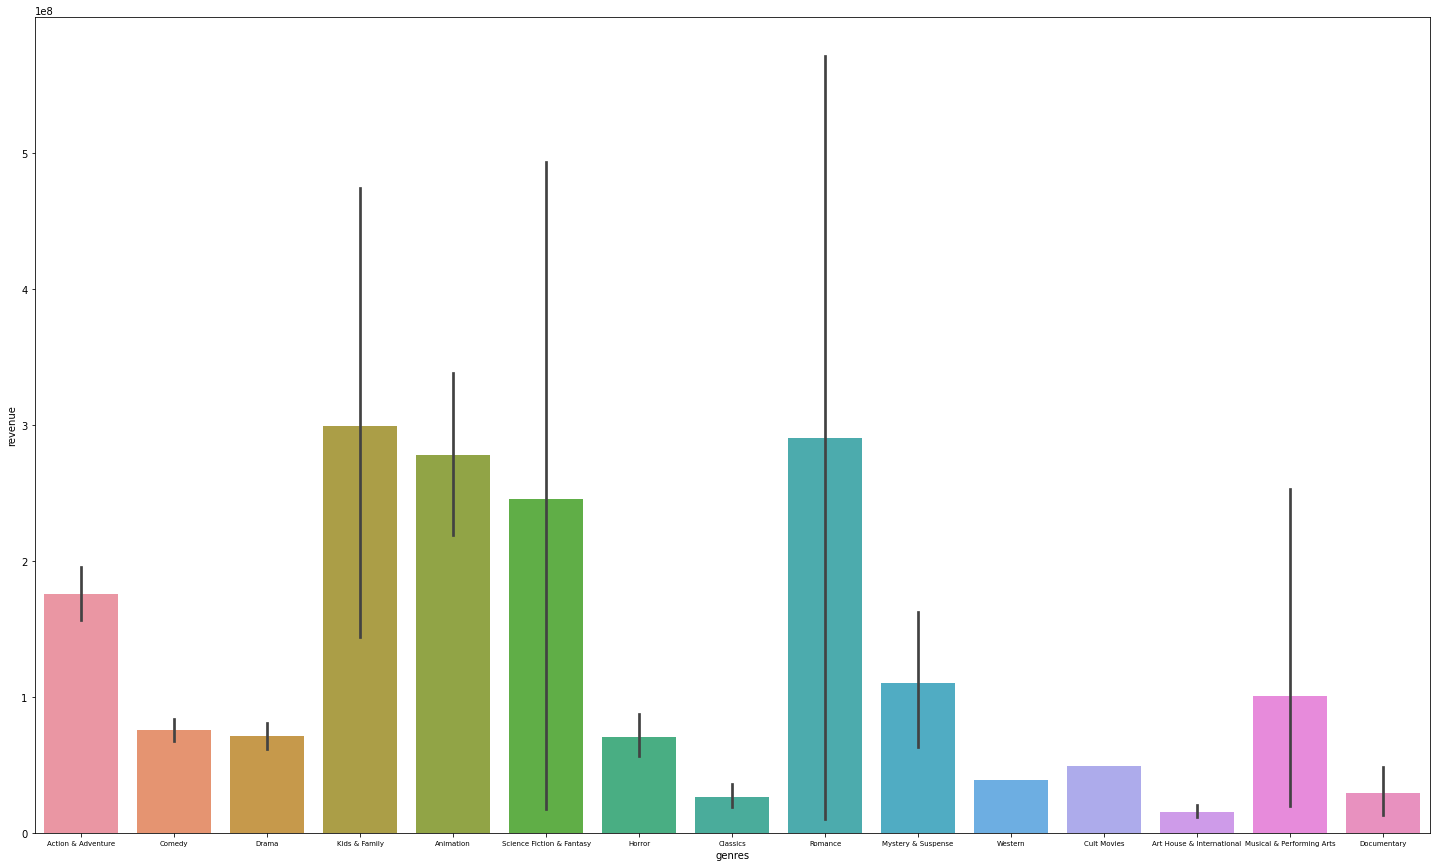

In [35]:
ax = sns.barplot(data= movie_df, x = 'genres', y = 'revenue')
ax.figure.set_size_inches(25, 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

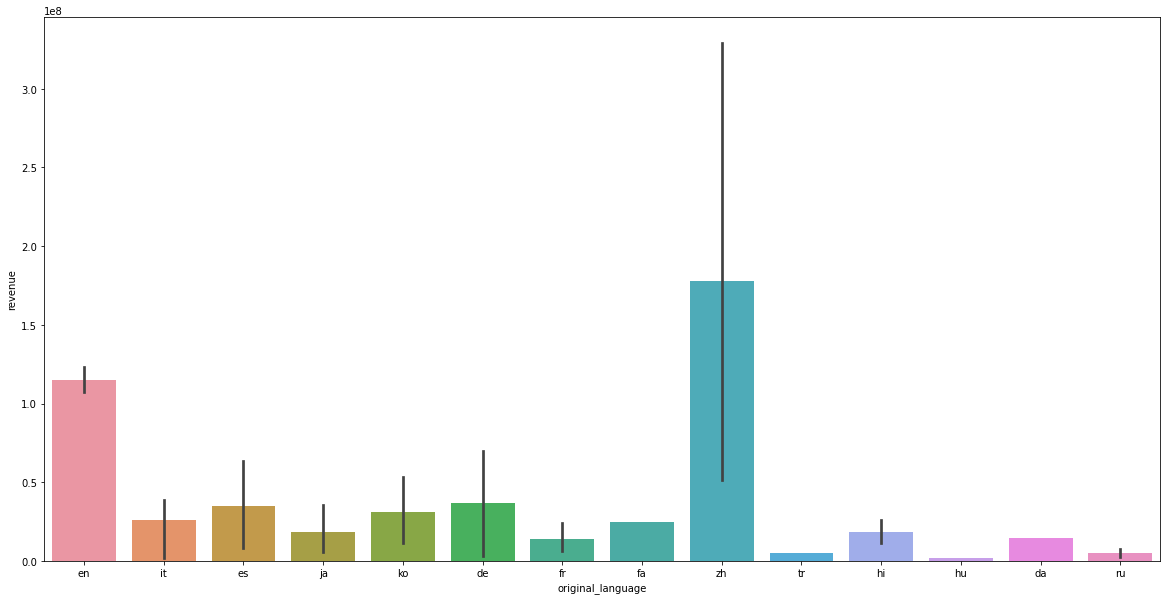

In [36]:
ax = sns.barplot(data= movie_df, x = 'original_language', y = 'revenue')
ax.figure.set_size_inches(20, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

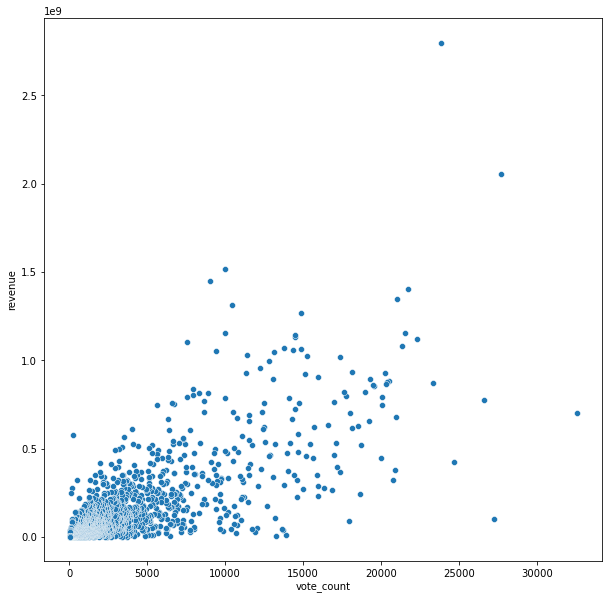

In [37]:
ax = sns.scatterplot(data= movie_df, x = 'vote_count', y = 'revenue')
ax.figure.set_size_inches(10, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

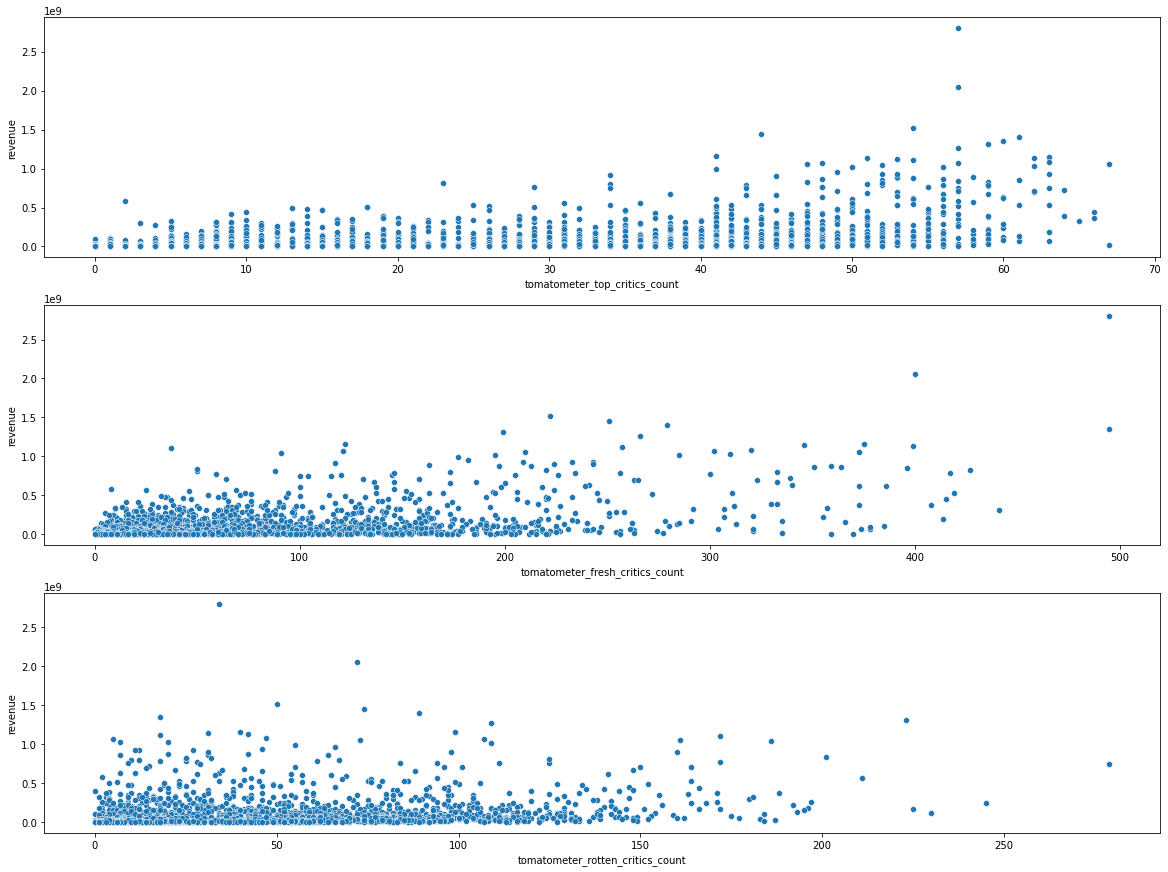

In [38]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.scatterplot(data= movie_df,x= 'tomatometer_top_critics_count', y = 'revenue')

plt.subplot(3,1,2)
sns.scatterplot(data= movie_df,x= 'tomatometer_fresh_critics_count', y = 'revenue')

plt.subplot(3,1,3)
sns.scatterplot(data= movie_df,x= 'tomatometer_rotten_critics_count', y = 'revenue')

plt.show()

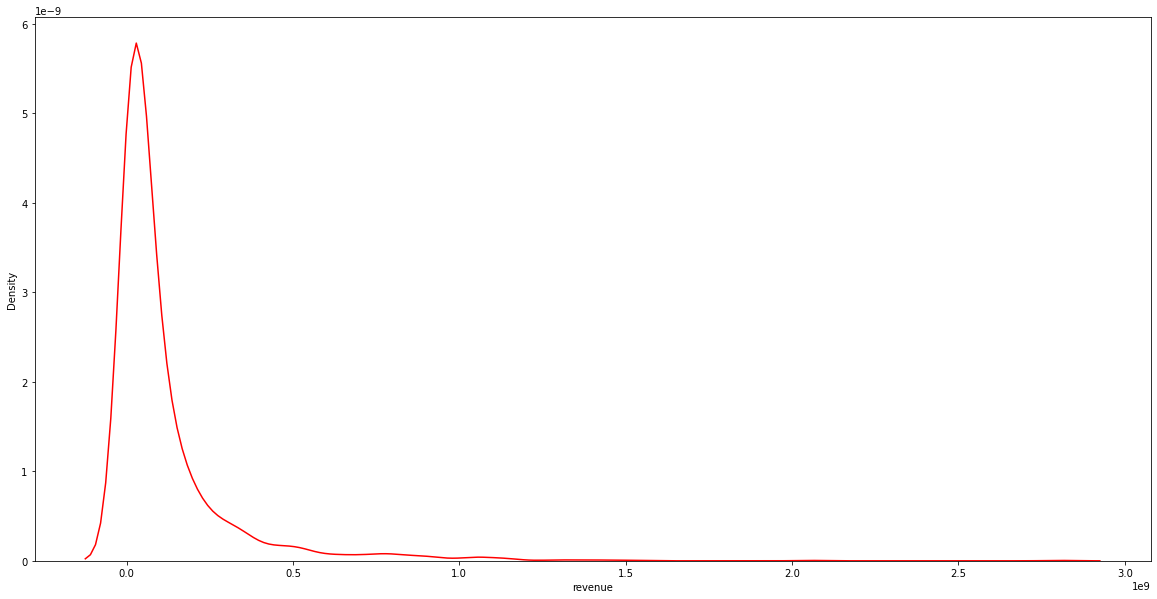

In [39]:
#ax = sns.histplot(data= movie_df['revenue'], bins=20, kde=True)

ax = sns.kdeplot(data = movie_df['revenue'], color= "red")
ax.figure.set_size_inches(20, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

In [40]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2324
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   movie_title                       2285 non-null   object 
 1   vote_average                      2285 non-null   float64
 2   vote_count                        2285 non-null   int64  
 3   release_date                      2285 non-null   object 
 4   revenue                           2285 non-null   int64  
 5   budget                            2285 non-null   int64  
 6   original_language                 2285 non-null   object 
 7   popularity                        2285 non-null   float64
 8   release_year                      2285 non-null   float64
 9   release_month                     2285 non-null   float64
 10  content_rating                    2285 non-null   object 
 11  genres                            2285 non-null   object 
 12  produc

The next visualization that we would like to create is a heatmap of our columns. This plot is useful because it helps visualize the correlations and relationships between different features, and will prove useful when trying to identify the correlation between our target variable and our features (this will help determine which features to select when training our model). To create the heatmap, all of our columns need to be numerical, which means we have to first convert all of our categorical features to numerical. This involves applying one-hot encoding on them.

In [41]:
#heatmap_df = movie_df.drop(['movie_title', 'release_date', 'production_company', 'tomatometer_status'], axis= 1)
# using get_dummies() to apply one-hot encoding on the following features
heatmap_df = pd.get_dummies(movie_df, columns=['genres', 'original_language', 'content_rating', 'release_decade']) 
heatmap_df

,movie_title,vote_average,vote_count,release_date,revenue,budget,popularity,release_year,release_month,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,runtime_bins,genres_Action & Adventure,genres_Animation,genres_Art House & International,genres_Classics,genres_Comedy,genres_Cult Movies,genres_Documentary,genres_Drama,genres_Horror,genres_Kids & Family,genres_Musical & Performing Arts,genres_Mystery & Suspense,genres_Romance,genres_Science Fiction & Fantasy,genres_Western,original_language_da,original_language_de,original_language_en,original_language_es,original_language_fa,original_language_fr,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_tr,original_language_zh,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,140.241,2014.0,11.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1,160.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,154.340,2018.0,4.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1,140.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,69.498,1999.0,10.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1,130.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,33.255,2014.0,7.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,54.224,2012.0,12.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1,160.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,3.541,1947.0,4.0,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6,122.5,1,2,1,1,120.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,2000000,4.384,2012.0,10.0,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6,101.0,2,1,1,1,100.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,13000000,4.889,1996.0,4.0,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14,89.5,2,1,1,1,80.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,12000000,4.933,1981.0,12.0,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6,79.0,1,1,1,1,70.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Now that we have our heatmap dataframe, we will use the corr() function to get a matrix of the correlations of each feature against each other feature. We will then modify the correlation matrix to only contain the correlation of the target value (revenue) against the other features, and then feed this modified correlation matrix to the heatmap.

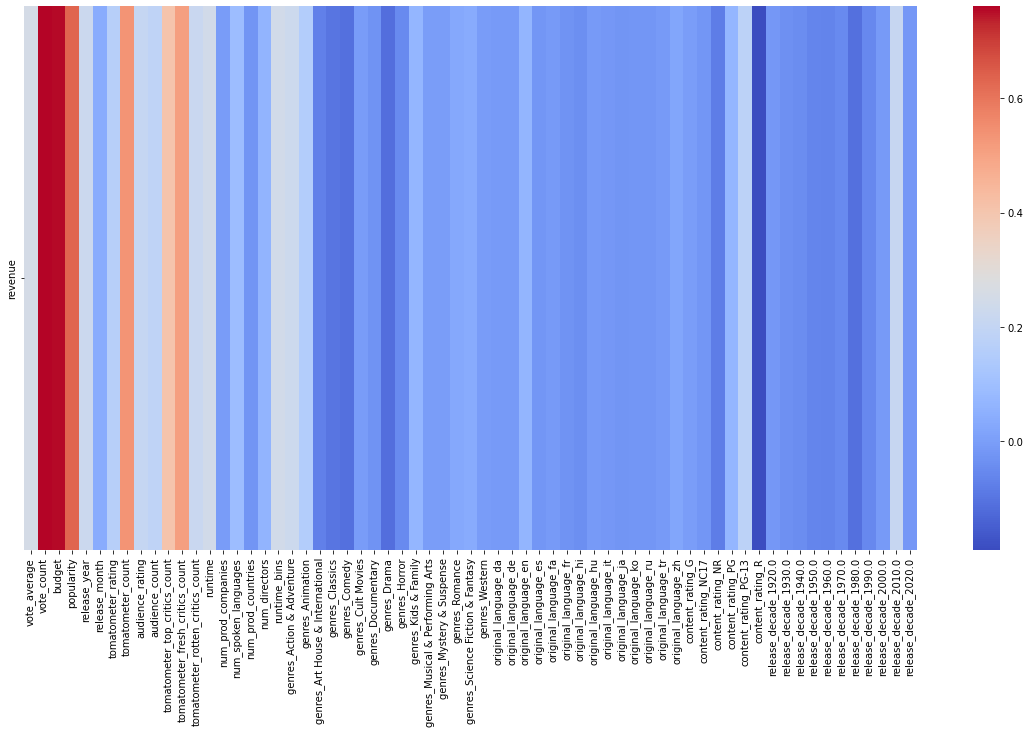

<Figure size 432x288 with 0 Axes>

In [43]:
#heatmap_df.drop(['movie_title'],axis=1,inplace=True)
corr_matrix = heatmap_df.corr()

corr_matrix = corr_matrix[['revenue']].drop(index='revenue').T

plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')

plt.show()
plt.tight_layout()

From the heatmap, we can see that features like vote_count, budget, popularity, tomatometer_count, and the 3 different tomatometer_critics_counts had a high magnitude of correlation with revenue, indicating that they seem to be important predictors of revenue.

In [44]:
corr_matrix.to_dict() # looking at the numerical correlation value of each feature to revenue 

{'vote_average': {'revenue': 0.2535897428113301},
 'vote_count': {'revenue': 0.7613522267955014},
 'budget': {'revenue': 0.7551740787382724},
 'popularity': {'revenue': 0.6332641352642914},
 'release_year': {'revenue': 0.2236421975498691},
 'release_month': {'revenue': 0.036271686146530945},
 'tomatometer_rating': {'revenue': 0.1632288309385605},
 'tomatometer_count': {'revenue': 0.5376000641211817},
 'audience_rating': {'revenue': 0.2051276906496388},
 'audience_count': {'revenue': 0.18784121653706828},
 'tomatometer_top_critics_count': {'revenue': 0.40675186827099313},
 'tomatometer_fresh_critics_count': {'revenue': 0.5110508100616251},
 'tomatometer_rotten_critics_count': {'revenue': 0.21462198976183777},
 'runtime': {'revenue': 0.2426503030451816},
 'num_prod_companies': {'revenue': -0.006952173385750647},
 'num_spoken_languages': {'revenue': 0.08957409307659099},
 'num_prod_countries': {'revenue': -0.024691714788190117},
 'num_directors': {'revenue': 0.05972749666792987},
 'runtim

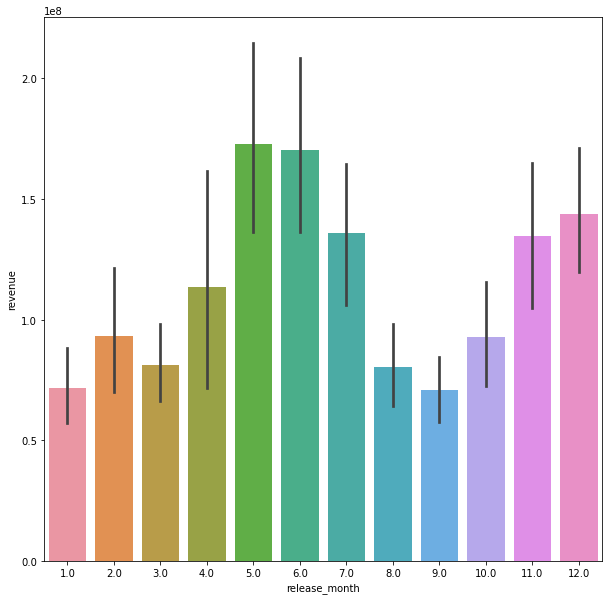

In [45]:
ax = sns.barplot(data= movie_df, x = 'release_month', y = 'revenue')
ax.figure.set_size_inches(10, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

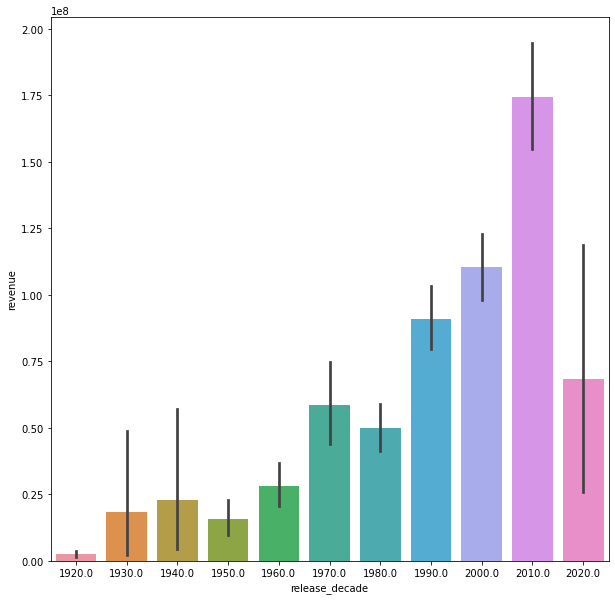

In [46]:
ax = sns.barplot(data= movie_df, x = 'release_decade', y = 'revenue')
ax.figure.set_size_inches(10, 10)
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.show()

## Model: Analysis, Hypothesis Testing, & ML

In [47]:
movie_df = pd.get_dummies(movie_df, columns=['genres', 'original_language', 'content_rating', 'release_decade'])
movie_df

,movie_title,vote_average,vote_count,release_date,revenue,budget,popularity,release_year,release_month,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,runtime_bins,genres_Action & Adventure,genres_Animation,genres_Art House & International,genres_Classics,genres_Comedy,genres_Cult Movies,genres_Documentary,genres_Drama,genres_Horror,genres_Kids & Family,genres_Musical & Performing Arts,genres_Mystery & Suspense,genres_Romance,genres_Science Fiction & Fantasy,genres_Western,original_language_da,original_language_de,original_language_en,original_language_es,original_language_fa,original_language_fr,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_tr,original_language_zh,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0
0,Interstellar,8.417,32571,2014-11-05 00:00:00,701729206,165000000,140.241,2014.0,11.0,Paramount Pictures,Certified-Fresh,72.0,364.0,86.0,175957.0,62,263,101,167.0,3,1,2,1,160.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Avengers: Infinity War,8.255,27713,2018-04-25 00:00:00,2052415039,300000000,154.340,2018.0,4.0,Walt Disney Pictures,Certified-Fresh,85.0,472.0,91.0,58720.0,57,400,72,149.0,1,2,1,1,140.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,Fight Club,8.438,27238,1999-10-15 00:00:00,100853753,63000000,69.498,1999.0,10.0,20th Century Fox,Certified-Fresh,79.0,173.0,96.0,1093242.0,40,137,36,139.0,7,1,1,1,130.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,Guardians of the Galaxy,7.906,26638,2014-07-30 00:00:00,772776600,170000000,33.255,2014.0,7.0,Walt Disney Pictures,Certified-Fresh,91.0,328.0,92.0,255582.0,59,300,28,121.0,1,1,1,1,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Django Unchained,8.171,24672,2012-12-25 00:00:00,425368238,100000000,54.224,2012.0,12.0,The Weinstein Co.,Certified-Fresh,87.0,288.0,91.0,429231.0,55,250,38,165.0,2,3,1,1,160.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,The Sea of Grass,6.200,23,1947-04-25 00:00:00,4689000,2349000,3.541,1947.0,4.0,Warner Home Video,Rotten,14.0,7.0,35.0,149.0,3,1,6,122.5,1,2,1,1,120.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2321,Middle of Nowhere,6.196,23,2012-10-12 00:00:00,2368060,2000000,4.384,2012.0,10.0,AFFRM,Certified-Fresh,88.0,50.0,64.0,2643.0,22,44,6,101.0,2,1,1,1,100.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2322,Faithful,5.200,21,1996-04-03 00:00:00,2104439,13000000,4.889,1996.0,4.0,New Line Home Entertainment,Rotten,7.0,15.0,49.0,1626.0,6,1,14,89.5,2,1,1,1,80.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2323,Heartbeeps,3.912,17,1981-12-18 00:00:00,2154696,12000000,4.933,1981.0,12.0,Universal Studios,Rotten,0.0,6.0,23.0,1460.0,0,0,6,79.0,1,1,1,1,70.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Removing features we don't want to train the model with (explain why somewhere)

In [48]:
movie_df_ml = movie_df.drop(['movie_title', 'vote_average', 'release_date', 'production_company', 'tomatometer_status', 'audience_count'], axis = 1)
movie_df_ml

,vote_count,revenue,budget,popularity,release_year,release_month,tomatometer_rating,tomatometer_count,audience_rating,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,runtime,num_prod_companies,num_spoken_languages,num_prod_countries,num_directors,runtime_bins,genres_Action & Adventure,genres_Animation,genres_Art House & International,genres_Classics,genres_Comedy,genres_Cult Movies,genres_Documentary,genres_Drama,genres_Horror,genres_Kids & Family,genres_Musical & Performing Arts,genres_Mystery & Suspense,genres_Romance,genres_Science Fiction & Fantasy,genres_Western,original_language_da,original_language_de,original_language_en,original_language_es,original_language_fa,original_language_fr,original_language_hi,original_language_hu,original_language_it,original_language_ja,original_language_ko,original_language_ru,original_language_tr,original_language_zh,content_rating_G,content_rating_NC17,content_rating_NR,content_rating_PG,content_rating_PG-13,content_rating_R,release_decade_1920.0,release_decade_1930.0,release_decade_1940.0,release_decade_1950.0,release_decade_1960.0,release_decade_1970.0,release_decade_1980.0,release_decade_1990.0,release_decade_2000.0,release_decade_2010.0,release_decade_2020.0
0,32571,701729206,165000000,140.241,2014.0,11.0,72.0,364.0,86.0,62,263,101,167.0,3,1,2,1,160.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,27713,2052415039,300000000,154.340,2018.0,4.0,85.0,472.0,91.0,57,400,72,149.0,1,2,1,1,140.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,27238,100853753,63000000,69.498,1999.0,10.0,79.0,173.0,96.0,40,137,36,139.0,7,1,1,1,130.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,26638,772776600,170000000,33.255,2014.0,7.0,91.0,328.0,92.0,59,300,28,121.0,1,1,1,1,120.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,24672,425368238,100000000,54.224,2012.0,12.0,87.0,288.0,91.0,55,250,38,165.0,2,3,1,1,160.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2320,23,4689000,2349000,3.541,1947.0,4.0,14.0,7.0,35.0,3,1,6,122.5,1,2,1,1,120.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2321,23,2368060,2000000,4.384,2012.0,10.0,88.0,50.0,64.0,22,44,6,101.0,2,1,1,1,100.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2322,21,2104439,13000000,4.889,1996.0,4.0,7.0,15.0,49.0,6,1,14,89.5,2,1,1,1,80.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2323,17,2154696,12000000,4.933,1981.0,12.0,0.0,6.0,23.0,0,0,6,79.0,1,1,1,1,70.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [49]:
movie_df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2285 entries, 0 to 2324
Data columns (total 64 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   vote_count                        2285 non-null   int64  
 1   revenue                           2285 non-null   int64  
 2   budget                            2285 non-null   int64  
 3   popularity                        2285 non-null   float64
 4   release_year                      2285 non-null   float64
 5   release_month                     2285 non-null   float64
 6   tomatometer_rating                2285 non-null   float64
 7   tomatometer_count                 2285 non-null   float64
 8   audience_rating                   2285 non-null   float64
 9   tomatometer_top_critics_count     2285 non-null   int64  
 10  tomatometer_fresh_critics_count   2285 non-null   int64  
 11  tomatometer_rotten_critics_count  2285 non-null   int64  
 12  runtim

Linear regression implementation

In [50]:
X = movie_df_ml.drop(['revenue'], axis= 1)

scaler = MinMaxScaler()
X = scaler.fit_transform(movie_df_ml)

# scaled_revenue = scaler.fit_transform(movie_df_ml[['revenue']].values.reshape(-1,1))
# movie_df_ml['revenue']=scaled_revenue
# y = movie_df_ml['revenue']

y = scaler.fit_transform(movie_df_ml[['revenue']].values.reshape(-1,1)).flatten()

kf = KFold(n_splits=10, shuffle=True, random_state=42)

lin_reg = LinearRegression()

mse_values = []
mae_values = []
mape_values = []

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    #y_train_scaled, y_test_scaled = y.iloc[train_indices], y.iloc[test_indices]
    y_train_scaled, y_test_scaled = y[train_indices], y[test_indices]

    lin_reg.fit(X_train, y_train_scaled)

    y_pred_scaled = lin_reg.predict(X_test)

    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    mse_values.append(mse)
    mae_values.append(mae)
    mape_values.append(mape)

average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_mape = np.mean(mape_values)

print("Average MSE Across Folds: " + str(average_mse))
print("Average MAE Across Folds: " + str(average_mae))
print("Average MAPE Across Folds: " + str(average_mape))


lin_reg.fit(X, y)
train_y_pred_scaled = lin_reg.predict(X)

train_y_pred = scaler.inverse_transform(train_y_pred_scaled.reshape(-1, 1)).flatten()
train_y = scaler.inverse_transform(y.reshape(-1,1)).flatten()

print("-----------------------------------")
train_mse = mean_squared_error(train_y, train_y_pred)
print("Train MSE: " + str(train_mse))
train_mae = mean_absolute_error(train_y, train_y_pred)
print("Train MAE: " + str(train_mae))

Average MSE Across Folds: 648005763598.3079
Average MAE Across Folds: 37467.780586970315
Average MAPE Across Folds: 1.1472714451961743
-----------------------------------
Train MSE: 1.5630928514175719e-12
Train MAE: 9.647604685350112e-07


Ridge Regression

In [51]:
# we can mess with alpha value if we want
ridge_reg = Ridge()

mse_values = []
mae_values = []
mape_values = []

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    #y_train_scaled, y_test_scaled = y.iloc[train_indices], y.iloc[test_indices]
    y_train_scaled, y_test_scaled = y[train_indices], y[test_indices]

    ridge_reg.fit(X_train, y_train_scaled)

    y_pred_scaled = ridge_reg.predict(X_test)

    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    mse_values.append(mse)
    mae_values.append(mae)
    mape_values.append(mape)

average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_mape = np.mean(mape_values)

print("Average MSE Across Folds: " + str(average_mse))
print("Average MAE Across Folds: " + str(average_mae))
print("Average MAPE Across Folds: " + str(average_mape))


ridge_reg.fit(X, y)
train_y_pred_scaled = ridge_reg.predict(X)

train_y_pred = scaler.inverse_transform(train_y_pred_scaled.reshape(-1, 1)).flatten()
train_y = scaler.inverse_transform(y.reshape(-1,1)).flatten()

print("-----------------------------------")
train_mse = mean_squared_error(train_y, train_y_pred)
print("Train MSE: " + str(train_mse))
train_mae = mean_absolute_error(train_y, train_y_pred)
print("Train MAE: " + str(train_mae))

Average MSE Across Folds: 763915460029992.1
Average MAE Across Folds: 15985881.549333561
Average MAPE Across Folds: 67.19292036928434
-----------------------------------
Train MSE: 618140326910991.6
Train MAE: 14440640.529279126


ridge regression does seem to provide some reduction in overfitting

50


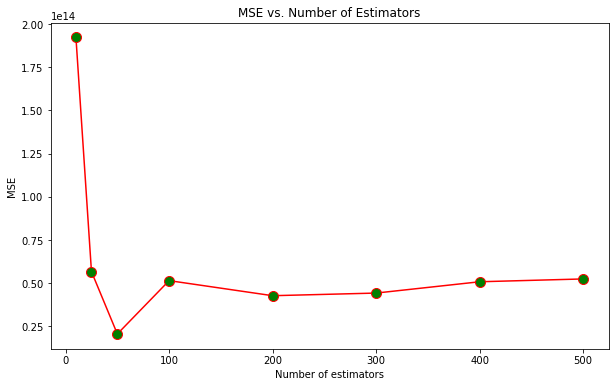

In [52]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size= 0.3, shuffle = True, random_state = 42)

mse_values = []

estimators_numbers = [10, 25, 50, 100, 200, 300, 400, 500]
# finding optimal number of estimators
for num_estimators in estimators_numbers:
    rf = RandomForestRegressor(n_estimators= num_estimators, n_jobs= -1, random_state= 42) #n_jobs parallelizes training process across multiple CPU cores

    rf.fit(X_train, y_train_scaled)

    y_pred_scaled = rf.predict(X_test)

    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

plt.figure(figsize=(10,6))
plt.plot(estimators_numbers, mse_values, color='red', marker='o', markerfacecolor='green', markersize=10)
plt.title('MSE vs. Number of Estimators')
plt.xlabel('Number of estimators')
plt.ylabel('MSE')

optimal_num_estimators = estimators_numbers[np.argmin(mse_values)]
print(optimal_num_estimators)


In [53]:
rf_reg = RandomForestRegressor(n_estimators= optimal_num_estimators, random_state= 42)

mse_values = []
mae_values = []
mape_values = []

for train_indices, test_indices in kf.split(X):
    X_train, X_test = X[train_indices], X[test_indices]
    #y_train_scaled, y_test_scaled = y.iloc[train_indices], y.iloc[test_indices]
    y_train_scaled, y_test_scaled = y[train_indices], y[test_indices]

    rf_reg.fit(X_train, y_train_scaled)

    y_pred_scaled = rf_reg.predict(X_test)

    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    mse_values.append(mse)
    mae_values.append(mae)
    mape_values.append(mape)

average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_mape = np.mean(mape_values)

print("Average MSE Across Folds: " + str(average_mse))
print("Average MAE Across Folds: " + str(average_mae))
print("Average MAPE Across Folds: " + str(average_mape))

rf_reg.fit(X, y)
train_y_pred_scaled = rf_reg.predict(X)

train_y_pred = scaler.inverse_transform(train_y_pred_scaled.reshape(-1, 1)).flatten()
train_y = scaler.inverse_transform(y.reshape(-1,1)).flatten()

print("-----------------------------------")
train_mse = mean_squared_error(train_y, train_y_pred)
print("Train MSE: " + str(train_mse))
train_mae = mean_absolute_error(train_y, train_y_pred)
print("Train MAE: " + str(train_mae))

Average MSE Across Folds: 769429798716620.0
Average MAE Across Folds: 1748511.3403693177
Average MAPE Across Folds: 0.3520116271298341
-----------------------------------
Train MSE: 64480390816546.38
Train MAE: 658624.6869970782


Maybe do some hyperparamter tuning with Grid Search CV for Random Forest regresor? Seems that there is some overfitting.

11


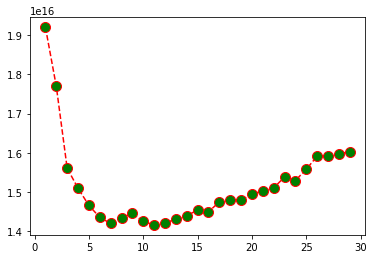

In [54]:
x_train, x_test, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.3, shuffle=True, random_state= 42)

# Finding the best K value for KNN
K_values=range(1,30)
scores=[]

for k in K_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train, y_train_scaled)

    y_pred_scaled=knn_regressor.predict(x_test)

    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

    scores.append(mean_squared_error(y_pred, y_test))

best_knn_val = K_values[np.argmin(scores)]
print(best_knn_val)
plt.plot(K_values,scores, color='red', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [55]:
knn_regressor = KNeighborsRegressor(n_neighbors=best_knn_val)
K_values_lst=[]
mse=[]
mae=[]
mape_values = []


for train_indices, test_indices in kf.split(X):
    x_train, x_test = X[train_indices], X[test_indices]
    y_train_scaled, y_test_scaled = y[train_indices], y[test_indices]
    
    knn_regressor.fit(x_train, y_train_scaled)
    y_pred_scaled=knn_regressor.predict(x_test)
    
    y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
    y_test = scaler.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100

    mse_values.append(mse)
    mae_values.append(mae)
    mape_values.append(mape)


average_mse = np.mean(mse_values)
average_mae = np.mean(mae_values)
average_mape = np.mean(mape_values)

print("Average MSE Across Folds: " + str(average_mse))
print("Average MAE Across Folds: " + str(average_mae))
print("Average MAPE Across Folds: " + str(average_mape))

knn_regressor.fit(X, y)
train_y_pred_scaled = knn_regressor.predict(X)

train_y_pred = scaler.inverse_transform(train_y_pred_scaled.reshape(-1, 1)).flatten()
train_y = scaler.inverse_transform(y.reshape(-1,1)).flatten()

print("-----------------------------------")
train_mse = mean_squared_error(train_y, train_y_pred)
print("Train MSE: " + str(train_mse))
train_mae = mean_absolute_error(train_y, train_y_pred)
print("Train MAE: " + str(train_mae))

Average MSE Across Folds: 7665709995360621.0
Average MAE Across Folds: 34560726.46627316
Average MAPE Across Folds: 346.2315874507229
-----------------------------------
Train MSE: 1.1657893398876886e+16
Train MAE: 60071244.5525363


KNN looks like it's underfitting

## Interpretation: Insight & Policy Decision

In this section, we will be analyzing our model results and data to derive insights, draw conclusions, and make inferences about our data.

In terms of our models, while our linear regression model had the lowest MSE, MAE, and MAPE, it was clearly highly overfitted to the training set due to the significantly lower train MSE and MAE compared to the test MSE and MAE. Our ridge regression model seemed to be overfitting the least and had a relatively low MSE and MAE. However, its mean average percentage error was on the higher end, indicating that on average its revenue predictions are generally off by 67% of the actual revenue values. The random forest regression model also overfitted but to a lesser degree compared to the linear regression model, and had the lowest MAPE value (approximately 0.35%), indicating that on average its revenue predictions were very close to the actual revenue values. The KNN model exhibited the poorest performance out of all the models, as it struggled to fit well with the train data (underfitted) and also had an extremely high MAPE.

In general, most of our features in our movies dataframe seem to have some sort of direct impact on or correlation with the revenue, and there did seem to be some clear trends between features. For instance, as budget increases the revenue increases, and over time box office revenue for movies over the years increased (as expected). This makes sense due to the advent of social media/TVs ads/the internet (allowing for easier promotion of movies), improved movie filming/production technology, and larger budget allowances in recent decades. We could also see that movies in certain popular genres like romance, science fiction, animation, kid/family, and action/adventure generally seemed to have higher box office revenues. We also generally saw that higher rotten tomato ratings and statuses tended to correlate with high box office revenues, which makes sense since a more positive rating may make new viewers more interested in watching the movie. Direct trends like this were one of the primary reasons for why we chose certain features over others, and can be extrapolated to movies across a variety of genres. 

In our future research on this topic, we would explore more hyperparameter tuning techniques like GridSearchCV and Bayesian Optimization to alleviate some of the overfitting and underfitting issues we faced and minimize the error further. We can also look into more dimensionality reduction techniques like PCA, since the dimensionality of the data that we used to train the model was very high and may have conributed to the overfitting issues. We can also explore trying to make our genre distribution more balanced (getting more movies of a variety of genres), since the majority of our movies were in the action and adventure genre. This issue with the genre could be attributed to the fact that we chose genres_y, and genres_x may be more balanced in genres even though it has less genres. We could also explore different approaches for how we go about selecting genres from a list of genres, since our idea of picking the first genre out of the list of genres for a movie may be too simplistic, may not capture the nuances of the movie, and may not truly capture the dominant genre of a movie. In the future, we could also try incorporating other kinds of ratings alongside rotten tomatoes rating, such as the IMDb rating, since they may provide more information on critics' perceptions of movies. 

Overall, through our usage of the data science lifecycle, we were able to provide meaningful insight that can help individuals in the movie industry improve forecasting of box office revenue and give them a better idea of how they can optimize for certain factors and features that can improve their movie's likelihood of success at the box office.